In [6]:
#1 - Problema de negócio:
#desenvolver uma metodologia para uma operadora de Plano de Saúde, para previsionar o valor do plano de Saúde para os beneficiários

#2 - Análise exploratória

#3 - Pré-Processamento dos Dados

#4 - Construção e Avaliação da Máquina Preditiva

#Avaliando todos os fatores disponíveis para prever um alta no valor do plano de saúde


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
client_data = pd.read_csv("/Health_Data.csv")
client_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [9]:
client_data.shape

(3630, 7)

In [10]:
client_data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [11]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [12]:
client_data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
#incluindo a contagem das variáveis categóricas
client_data.describe(include=["O"])

,sex,smoker,region
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


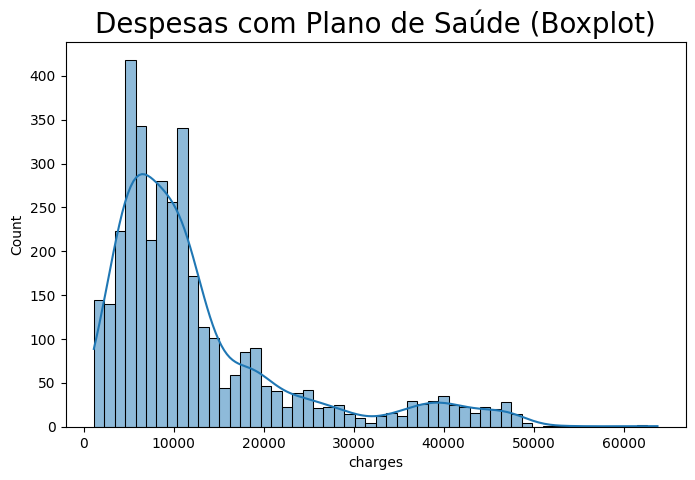

In [14]:
#Histograma de despesas de seguro médico
plt.figure(figsize=(8,5))
sns.histplot(client_data["charges"], kde= True)
plt.title("Despesas com Plano de Saúde (Boxplot)", fontsize=20)
plt.show()

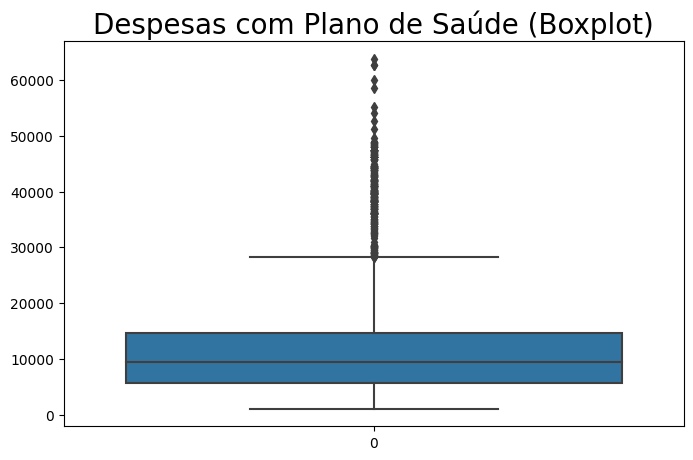

In [15]:
#Boxplot de despesas de seguro médico
plt.figure(figsize=(8,5))
sns.boxplot(client_data["charges"])
plt.title("Despesas com Plano de Saúde (Boxplot)", fontsize=20)
plt.show()

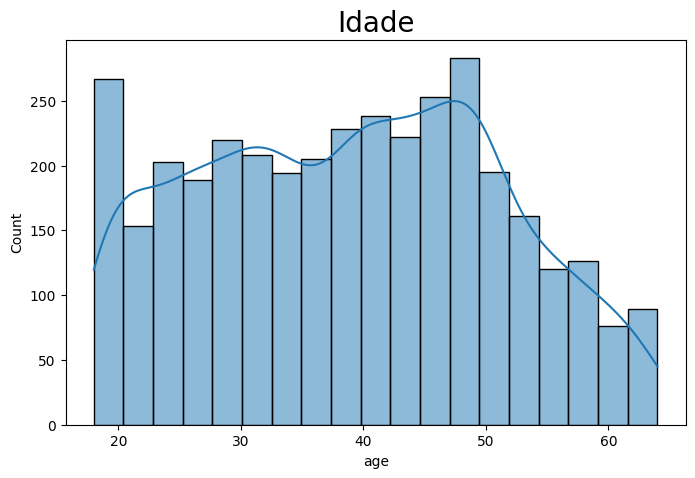

In [16]:
#Histograma de idade
plt.figure(figsize=(8,5))
sns.histplot(client_data["age"], kde=True)
plt.title("Idade", fontsize=20)
plt.show()

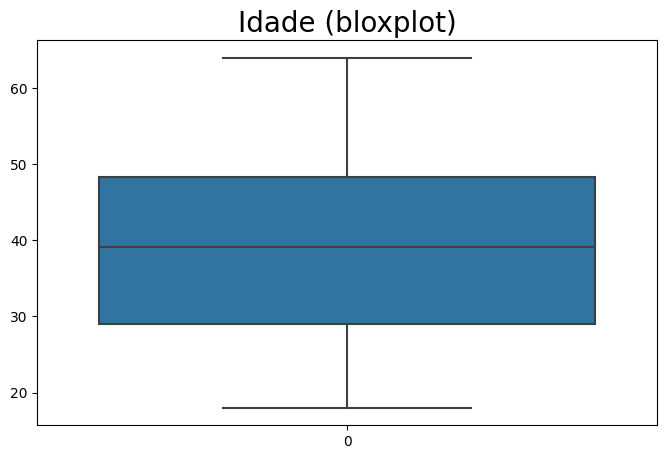

In [17]:
#Boxplot de idade
plt.figure(figsize=(8,5))
sns.boxplot(client_data["age"])
plt.title("Idade (bloxplot)", fontsize=20)
plt.show()

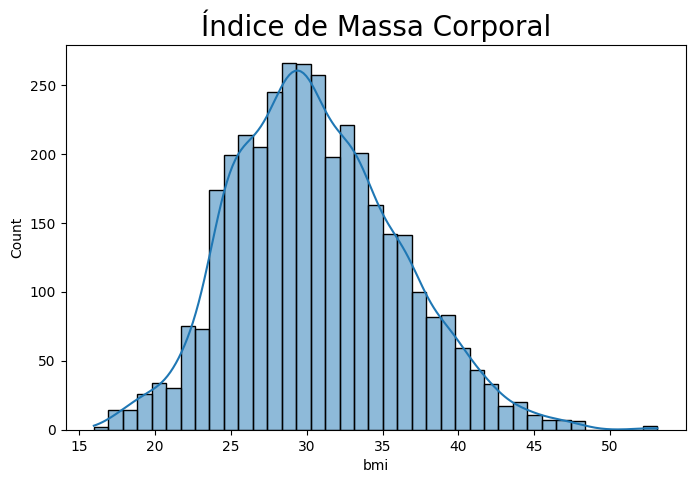

In [18]:
#Histograma Índice de massa corporal
plt.figure(figsize=(8,5))
sns.histplot(client_data['bmi'], kde=True)
plt.title("Índice de Massa Corporal", fontsize=20)
plt.show()


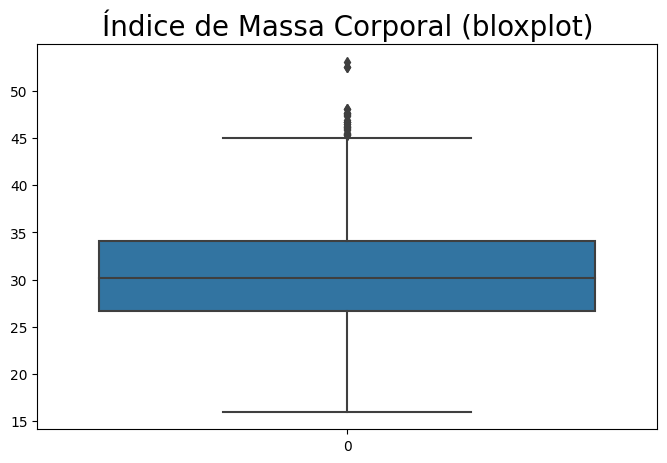

In [19]:
#Boxplot Índice de massa corporal
plt.figure(figsize=(8,5))
sns.boxplot(client_data["bmi"])
plt.title("Índice de Massa Corporal (bloxplot)", fontsize=20)
plt.show()

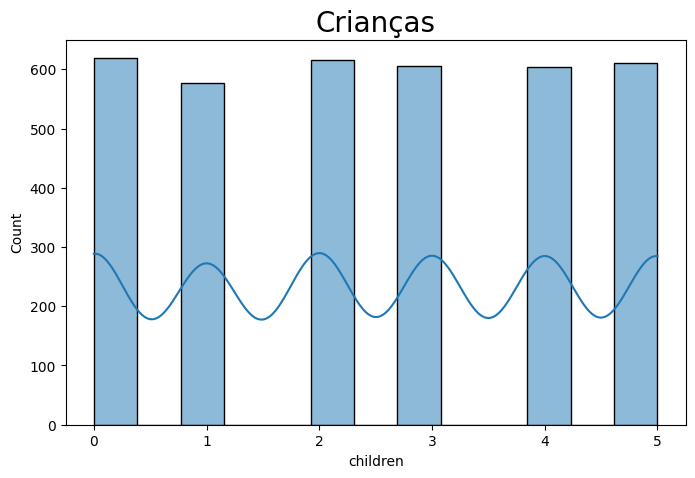

In [20]:
#Histograma de crianças
plt.figure(figsize=(8,5))
sns.histplot(client_data['children'], kde=True)
plt.title("Crianças", fontsize=20)
plt.show()


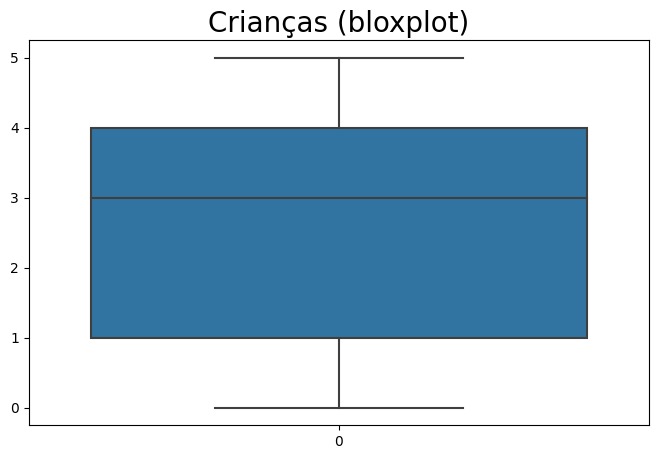

In [21]:
#Boxplot de crianças
plt.figure(figsize=(8,5))
sns.boxplot(client_data["children"])
plt.title("Crianças (bloxplot)", fontsize=20)
plt.show()

In [22]:
#Contagem de pessoas por sexo
print("Masculino:", client_data['sex'].value_counts()[0])
print("Feminino: ", client_data['sex'].value_counts()[1])

Masculino: 2029
Feminino:  1601


In [23]:
#Fumantes
print("Smokers:    ", client_data["smoker"].value_counts()[1])
print("Non-Smokers:", client_data["smoker"].value_counts()[0])

Smokers:     560
Non-Smokers: 3070


In [28]:
#Regiões
print("South-East region:", client_data["region"].value_counts()[0])
print("North-West region:", client_data["region"].value_counts()[0])
print("South-West region:", client_data["region"].value_counts()[0])
print("North-East region:", client_data["region"].value_counts()[0])

#Visualização
#sns.countplot(client_data["region"])
#sns.countplot(client_data["region"])
#plt.title("Regiões", fontsize=20)
#plt.show()


South-East region: 1021
North-West region: 1021
South-West region: 1021
North-East region: 1021


In [26]:
#top 5 primeiros registros
client_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [29]:
#Pré-processamento de dados
#arredondar a varável AGE:
client_data["age"] = round(client_data["age"])

In [30]:
#primeiros 5 registros, depois de arredondar
client_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.745000,no,northeast,2,3279.868550
1,37.0,female,25.744165,yes,southeast,3,21454.494239
2,18.0,male,30.030000,no,southeast,1,1720.353700
3,37.0,male,30.676891,no,northeast,3,6801.437542
4,58.0,male,32.010000,no,southeast,1,11946.625900


In [31]:
#OHEncoding: Transformar variáveis em numéricas através do One Hot Encoding
client_data = pd.get_dummies(client_data, drop_first=True)

In [32]:
# Primeiros 2 registros depois de encoding
client_data.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0


In [33]:
#Colunas
client_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [34]:
#Organizando colunas para melhor visualização
client_data = client_data[["age", "sex_male", "smoker_yes", "bmi", "children", "region_northwest", "region_southeast", "region_southwest"]]
client_data.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest
0,21.0,1,0,25.745000,2,0,0,0
1,37.0,0,1,25.744165,3,0,1,0


In [35]:
#Separando os dados
# : significa que pega todas as linhas
# -1 refere-se a ultima coluna, o y
x = client_data.iloc[:, :-1]
y = client_data.iloc[:, -1]

In [36]:
x.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast
0,21.0,1,0,25.745000,2,0,0
1,37.0,0,1,25.744165,3,0,1


In [37]:
y.head(2)

0    0
1    0
Name: region_southwest, dtype: uint8

In [39]:
#Train Test Split:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [40]:
#Construção e Avaliação da Máquina Preditiva
#começando a criar a metodologia de previsão do valor do custo do plano de saúde
#importar as métricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
#MP com regressão linear
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

#Predição
y_pred = LinearRegression.predict(x_test)

#Resultados
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

#quanto mais próximo de 100% melhor

0.3357364650395046
0.11514929661428434


In [43]:
#MP com regressão Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(x_train, y_train)

#Predição
y_pred = Ridge.predict(x_test)

#Resultados
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.3358576016212075
0.11512829773139643


In [44]:
#MP com regressão Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(x_train, y_train)

#Prediction
y_pred = Lasso.predict(x_test)

#resultados
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-0.0010944750897470268
0.17353854093147855


In [ ]:
#MP com Random Forest